In [2]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
# Get the current working directory
current_dir = os.getcwd()

# Append the parent directory
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

# ignore warrnings
import warnings
warnings.filterwarnings("ignore")
from db.dbConnections import PostgresConnection
from scripts.utils import *

In [3]:
db=PostgresConnection()
db.connect()

query='select * from xdr_data'
db.execute_query(query)

df=db.fetch_data(query)
df.head()

Connected to PostgreSQL database
Query executed successfully


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,Thu Apr 04 2019 15:01:18 GMT+0300 (East Africa...,770.0,Thu Apr 25 2019 17:35:31 GMT+0300 (East Africa...,662.0,1.823653e+09,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,Tue Apr 09 2019 16:04:04 GMT+0300 (East Africa...,235.0,Thu Apr 25 2019 11:15:48 GMT+0300 (East Africa...,606.0,1.365104e+09,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,Tue Apr 09 2019 20:42:11 GMT+0300 (East Africa...,1.0,Thu Apr 25 2019 14:58:13 GMT+0300 (East Africa...,652.0,1.361763e+09,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,Wed Apr 10 2019 03:31:25 GMT+0300 (East Africa...,486.0,Thu Apr 25 2019 10:36:35 GMT+0300 (East Africa...,171.0,1.321510e+09,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,Fri Apr 12 2019 23:10:23 GMT+0300 (East Africa...,565.0,Thu Apr 25 2019 13:40:32 GMT+0300 (East Africa...,954.0,1.089009e+09,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
engagement_analyser=EngagementAnalyzer(df)
engagement_analyser.user_engagement(df)

,MSISDN/Number,Session Frequency,Total Session Duration (ms),Total UL (Bytes),Total DL (Bytes)
0,3.360100e+10,1,116720140.0,36053108.0,8.426375e+08
1,3.360100e+10,1,181230963.0,36104459.0,1.207552e+08
2,3.360100e+10,1,134969374.0,39306820.0,5.566597e+08
3,3.360101e+10,1,49878024.0,20327526.0,4.019932e+08
4,3.360101e+10,2,37104453.0,94280527.0,1.363130e+09
...,...,...,...,...,...
106851,3.379000e+10,1,8810688.0,26716429.0,6.879252e+08
106852,3.379000e+10,1,140988659.0,35732243.0,4.445751e+08
106853,3.197021e+12,1,877385325.0,37295915.0,1.948281e+08
106854,3.370000e+14,1,253030201.0,56652839.0,5.396350e+08


In [5]:
engagement_analyser.high_engagement_users(df)


,MSISDN/Number,Session Frequency,Total Session Duration (ms),Total UL (Bytes),Total DL (Bytes)
33,3.360106e+10,2,3.297536e+08,93715624.0,1.356137e+09
121,3.360125e+10,3,5.329498e+08,141294920.0,1.334793e+09
133,3.360127e+10,5,4.598210e+08,171891831.0,1.751269e+09
147,3.360128e+10,4,3.611057e+08,164301781.0,1.759794e+09
181,3.360135e+10,3,3.667635e+08,131344904.0,1.291056e+09
...,...,...,...,...,...
106683,3.378859e+10,5,1.468846e+09,219653168.0,1.664957e+09
106726,3.378905e+10,3,4.053893e+08,109471806.0,1.993635e+09
106758,3.378944e+10,4,9.871790e+08,205801366.0,1.953776e+09
106823,3.378977e+10,3,4.911705e+08,148243207.0,2.062120e+09


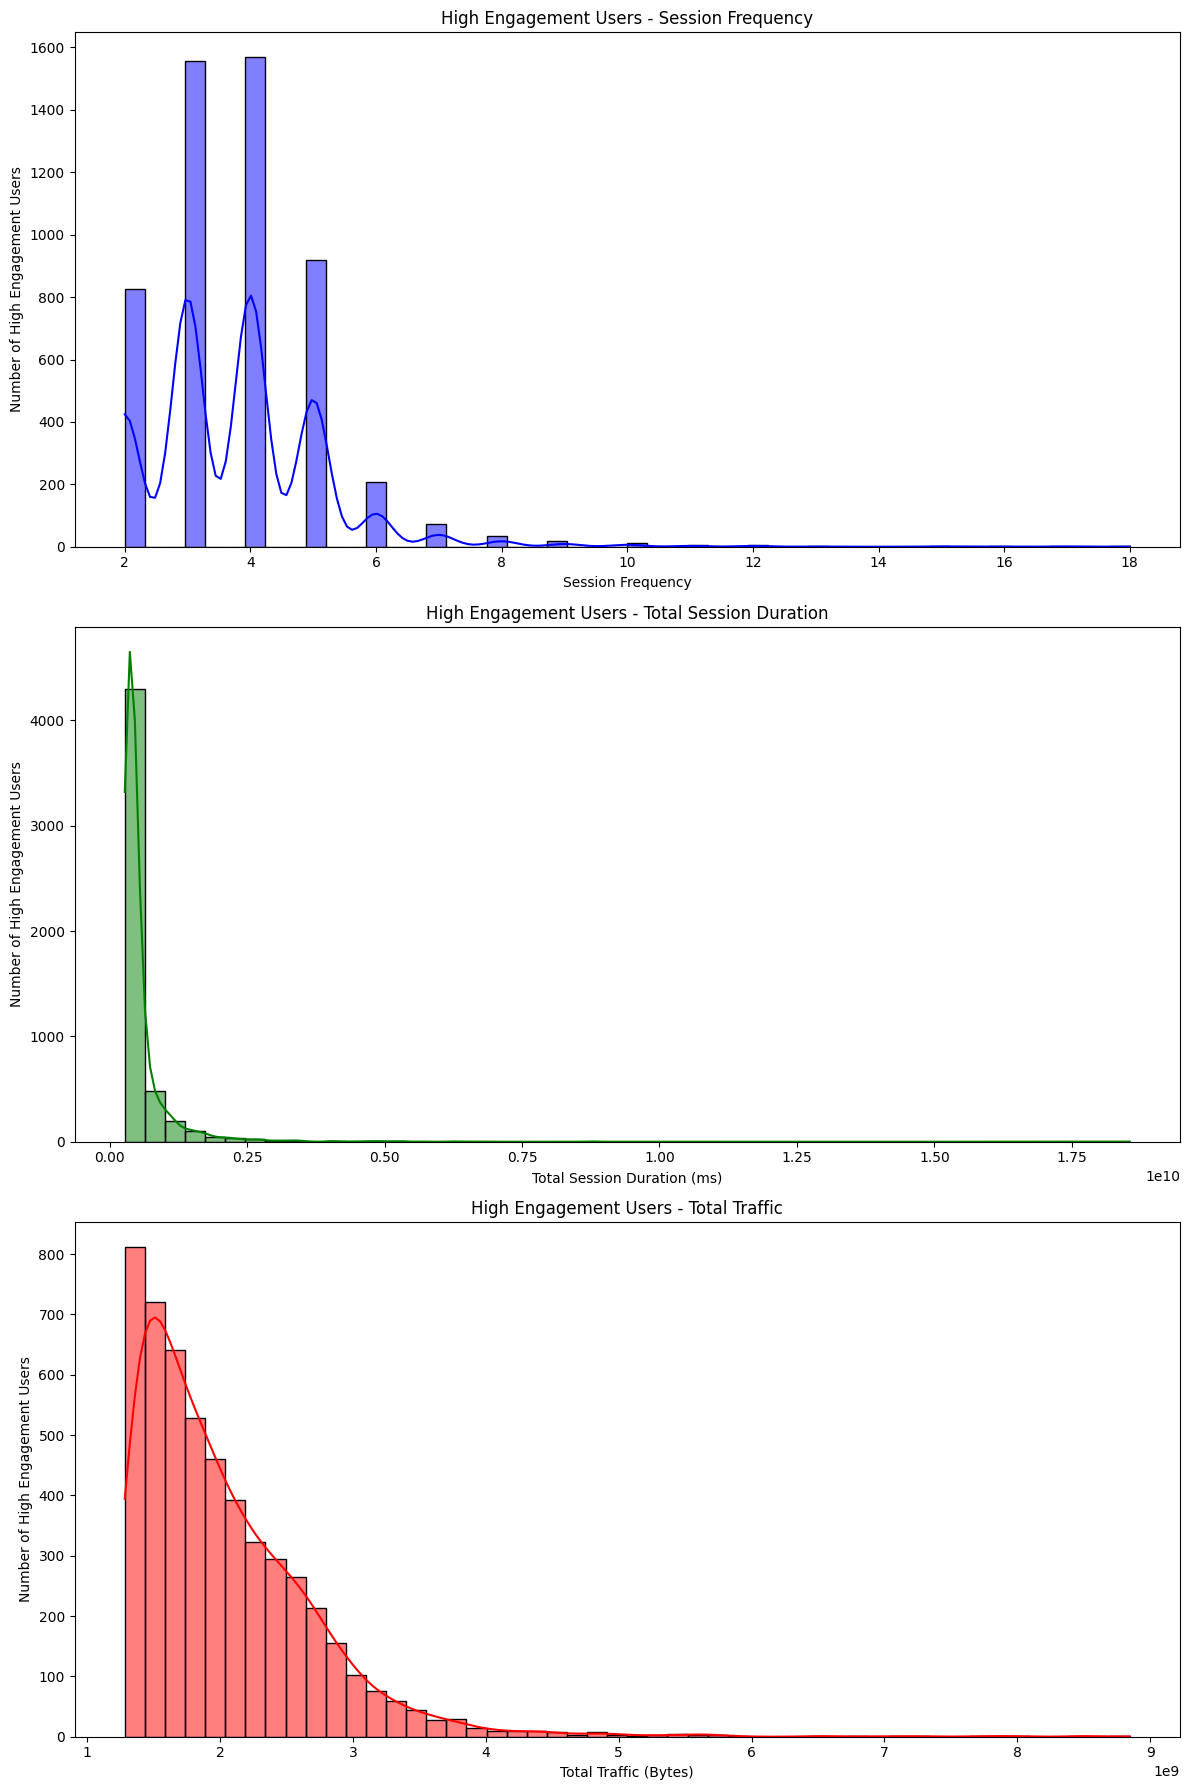

In [6]:
engagement_analyser.plot_user_engagement(df)


In [7]:
engagement_analyser.top_10_users_per_metric(df)


Top 10 Users by Session Frequency:
        MSISDN/Number  Session Frequency  Total Session Duration (ms)  \
13526   3.362632e+10                 18                 8.791937e+09   
6437    3.361489e+10                 17                 9.966906e+09   
13180   3.362578e+10                 17                 1.855376e+10   
37052   3.365973e+10                 16                 4.035436e+09   
76363   3.367588e+10                 15                 4.865954e+09   
92923   3.376054e+10                 15                 9.279442e+09   
65118   3.366716e+10                 13                 8.744922e+09   
666     3.360313e+10                 12                 6.287767e+09   
1279    3.360452e+10                 12                 5.207995e+09   
13994   3.362708e+10                 12                 4.703519e+09   

       Total UL (Bytes)  Total DL (Bytes)  Total Traffic (Bytes)  
13526       669650721.0      7.301517e+09           7.971167e+09  
6437        689483001.0      8.156743

In [8]:
engagement_analyser.top_10_users(df)


(       MSISDN/Number  Session Frequency  Total Session Duration (ms)  \
 13526   3.362632e+10                 18                 8.791937e+09   
 6437    3.361489e+10                 17                 9.966906e+09   
 13180   3.362578e+10                 17                 1.855376e+10   
 37052   3.365973e+10                 16                 4.035436e+09   
 76363   3.367588e+10                 15                 4.865954e+09   
 92923   3.376054e+10                 15                 9.279442e+09   
 65118   3.366716e+10                 13                 8.744922e+09   
 666     3.360313e+10                 12                 6.287767e+09   
 1279    3.360452e+10                 12                 5.207995e+09   
 13994   3.362708e+10                 12                 4.703519e+09   
 
        Total UL (Bytes)  Total DL (Bytes)  Total Traffic (Bytes)  
 13526       669650721.0      7.301517e+09           7.971167e+09  
 6437        689483001.0      8.156743e+09           8.8462

In [9]:
# List of application columns
applications = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 
    'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)'
]

# Aggregate traffic per user per application
app_engagement = engagement_analyser.aggregate_traffic_per_user(df, applications)

# Calculate total traffic per application
app_engagement =  engagement_analyser.calculate_total_traffic(app_engagement, applications)

# Get top 10 users for Social Media traffic
top10_social_media_users =  engagement_analyser.get_top_users(app_engagement, 'Social Media')

top10_social_media_users

,MSISDN/Number,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),...,Google UL Total (Bytes),Email DL Total (Bytes),Email UL Total (Bytes),Youtube DL Total (Bytes),Youtube UL Total (Bytes),Netflix DL Total (Bytes),Netflix UL Total (Bytes),Gaming DL Total (Bytes),Gaming UL Total (Bytes),Social Media Total (Bytes)
13526,3.362632e+10,42743837.0,630942.0,116106455.0,36085397.0,33404785.0,9013997.0,164048706.0,210434341.0,199479238.0,...,36085397.0,33404785.0,9013997.0,164048706.0,210434341.0,199479238.0,129246502.0,6.745734e+09,141838597.0,43374779.0
92923,3.376054e+10,39297646.0,485543.0,88626532.0,34596567.0,26437895.0,7255872.0,194068298.0,202220900.0,146500839.0,...,34596567.0,26437895.0,7255872.0,194068298.0,202220900.0,146500839.0,188142430.0,7.316364e+09,144681056.0,39783189.0
37052,3.365973e+10,34900444.0,511914.0,90958549.0,25557796.0,29907647.0,6092145.0,119658146.0,138332942.0,196277206.0,...,25557796.0,29907647.0,6092145.0,119658146.0,138332942.0,196277206.0,203241873.0,6.609900e+09,115658741.0,35412358.0
6437,3.361489e+10,27749744.0,544800.0,93941708.0,34032079.0,33607211.0,7181423.0,199823443.0,194546775.0,179585986.0,...,34032079.0,33607211.0,7181423.0,199823443.0,194546775.0,179585986.0,181815060.0,7.622035e+09,127396833.0,28294544.0
13180,3.362578e+10,26564121.0,571379.0,107904739.0,34403176.0,31895412.0,8738554.0,237883033.0,215075736.0,193912238.0,...,34403176.0,31895412.0,8738554.0,237883033.0,215075736.0,193912238.0,163068369.0,7.171884e+09,154789688.0,27135500.0
65118,3.366716e+10,23753753.0,494097.0,71707826.0,33324870.0,23276752.0,7059044.0,141972692.0,173258618.0,167932406.0,...,33324870.0,23276752.0,7059044.0,141972692.0,173258618.0,167932406.0,146007082.0,4.623424e+09,102197663.0,24247850.0
106137,3.378632e+10,23568655.0,406264.0,78819810.0,31434674.0,30876908.0,5433215.0,118129859.0,96634053.0,163602702.0,...,31434674.0,30876908.0,5433215.0,118129859.0,96634053.0,163602702.0,142337088.0,4.740903e+09,110192303.0,23974919.0
70960,3.366907e+10,23477047.0,323787.0,54915216.0,22909468.0,17813584.0,5109829.0,136295265.0,100107539.0,78923699.0,...,22909468.0,17813584.0,5109829.0,136295265.0,100107539.0,78923699.0,133085331.0,3.166462e+09,102690051.0,23800834.0
666,3.360313e+10,22776679.0,301146.0,73942055.0,12986961.0,20343728.0,5855167.0,158976704.0,125113435.0,156086546.0,...,12986961.0,20343728.0,5855167.0,158976704.0,125113435.0,156086546.0,104401875.0,4.108482e+09,82962892.0,23077825.0
31331,3.365849e+10,22695673.0,304393.0,55457602.0,20976541.0,15004556.0,4673135.0,64799443.0,118464776.0,78217369.0,...,20976541.0,15004556.0,4673135.0,64799443.0,118464776.0,78217369.0,108576562.0,2.071045e+09,54024030.0,23000066.0


In [10]:

print('Aggregate User Total Traffic per Application and Derive the Top 10 Most Engaged Users per Application')
# Prepare the user engagement data by aggregating and calculating necessary metrics
# The function returns:
# - user_engagement_df: DataFrame with aggregated user engagement metrics for each user
# - top10_sessions: DataFrame with the top 10 users by the number of sessions (Session Frequency)
# - top10_duration: DataFrame with the top 10 users by the total duration of data usage
# - top10_traffic: DataFrame with the top 10 users by the total traffic (upload + download bytes)
user_engagement_df, top10_sessions, top10_duration, top10_traffic = engagement_analyser.prepare_user_engagement_data(df)

Aggregate User Total Traffic per Application and Derive the Top 10 Most Engaged Users per Application


In [11]:
user_engagement_df


,MSISDN/Number,Session Frequency,Total Duration,Total UL (Bytes),Total DL (Bytes),Total Traffic (Bytes)
0,3.360100e+10,1,8.786906e+08,36053108.0,8.426375e+08,8.786906e+08
1,3.360100e+10,1,1.568596e+08,36104459.0,1.207552e+08,1.568596e+08
2,3.360100e+10,1,5.959665e+08,39306820.0,5.566597e+08,5.959665e+08
3,3.360101e+10,1,4.223207e+08,20327526.0,4.019932e+08,4.223207e+08
4,3.360101e+10,2,1.457411e+09,94280527.0,1.363130e+09,1.457411e+09
...,...,...,...,...,...,...
106851,3.379000e+10,1,7.146416e+08,26716429.0,6.879252e+08,7.146416e+08
106852,3.379000e+10,1,4.803073e+08,35732243.0,4.445751e+08,4.803073e+08
106853,3.197021e+12,1,2.321240e+08,37295915.0,1.948281e+08,2.321240e+08
106854,3.370000e+14,1,5.962878e+08,56652839.0,5.396350e+08,5.962878e+08


In [12]:
top10_duration


,MSISDN/Number,Session Frequency,Total Duration,Total UL (Bytes),Total DL (Bytes),Total Traffic (Bytes)
6437,3.361489e+10,17,8.846226e+09,689483001.0,8.156743e+09,8.846226e+09
92923,3.376054e+10,15,8.514774e+09,703478581.0,7.811295e+09,8.514774e+09
13180,3.362578e+10,17,8.499621e+09,729577380.0,7.770043e+09,8.499621e+09
13526,3.362632e+10,18,7.971167e+09,669650721.0,7.301517e+09,7.971167e+09
76363,3.367588e+10,15,7.891111e+09,581568792.0,7.309542e+09,7.891111e+09
37052,3.365973e+10,16,7.705863e+09,624260321.0,7.081602e+09,7.705863e+09
63028,3.366646e+10,11,7.308501e+09,405060976.0,6.903440e+09,7.308501e+09
92577,3.376041e+10,12,7.132371e+09,521518890.0,6.610852e+09,7.132371e+09
57241,3.366471e+10,11,6.872018e+09,471244453.0,6.400774e+09,6.872018e+09
86455,3.369879e+10,11,6.540899e+09,530343105.0,6.010556e+09,6.540899e+09


In [13]:
top10_traffic


,MSISDN/Number,Session Frequency,Total Duration,Total UL (Bytes),Total DL (Bytes),Total Traffic (Bytes)
6437,3.361489e+10,17,8.846226e+09,689483001.0,8.156743e+09,8.846226e+09
92923,3.376054e+10,15,8.514774e+09,703478581.0,7.811295e+09,8.514774e+09
13180,3.362578e+10,17,8.499621e+09,729577380.0,7.770043e+09,8.499621e+09
13526,3.362632e+10,18,7.971167e+09,669650721.0,7.301517e+09,7.971167e+09
76363,3.367588e+10,15,7.891111e+09,581568792.0,7.309542e+09,7.891111e+09
37052,3.365973e+10,16,7.705863e+09,624260321.0,7.081602e+09,7.705863e+09
63028,3.366646e+10,11,7.308501e+09,405060976.0,6.903440e+09,7.308501e+09
92577,3.376041e+10,12,7.132371e+09,521518890.0,6.610852e+09,7.132371e+09
57241,3.366471e+10,11,6.872018e+09,471244453.0,6.400774e+09,6.872018e+09
86455,3.369879e+10,11,6.540899e+09,530343105.0,6.010556e+09,6.540899e+09


In [14]:
# Apply K-Means clustering to the user engagement data
# - The function normalizes the relevant engagement metrics (Session Frequency, Total Duration, Total Traffic)
# - K-Means clustering is then applied with n_clusters=3 to segment users into 3 clusters based on their engagement
# - The resulting DataFrame (user_engagement_df) will have an additional column, 'Engagement Cluster', indicating the cluster assignment for each user
user_engagement_df = engagement_analyser.apply_clustering(user_engagement_df, n_clusters=3)
user_engagement_df.head()

,MSISDN/Number,Session Frequency,Total Duration,Total UL (Bytes),Total DL (Bytes),Total Traffic (Bytes),Engagement Cluster
0,3.360100e+10,0.055556,0.095931,36053108.0,8.426375e+08,0.095931,2
1,3.360100e+10,0.055556,0.014026,36104459.0,1.207552e+08,0.014026,0
2,3.360100e+10,0.055556,0.063851,39306820.0,5.566597e+08,0.063851,0
3,3.360101e+10,0.055556,0.044148,20327526.0,4.019932e+08,0.044148,0
4,3.360101e+10,0.111111,0.161598,94280527.0,1.363130e+09,0.161598,2


In [16]:
# Re-attach non-normalized metrics to engagement_df
non_normalized_df = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',
    'Total Duration': 'sum',
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum',
}).reset_index()

non_normalized_df['Total Traffic (Bytes)'] = non_normalized_df['Total UL (Bytes)'] + non_normalized_df['Total DL (Bytes)']
non_normalized_df.rename(columns={'Bearer Id': 'Session Frequency'}, inplace=True)

# Merge cluster assignments
cluster_metrics = pd.merge(non_normalized_df, user_engagement_df[['MSISDN/Number', 'Engagement Cluster']], on='MSISDN/Number')

# Calculate statistics for each cluster
cluster_summary = cluster_metrics.groupby('Engagement Cluster').agg({
    'Session Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Duration': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
}).reset_index()

In [17]:
cluster_summary

Engagement Cluster Session Frequency                      Total Duration  \
                                   min max      mean    sum            min   
0                  0                 0   3  1.040668  58114   3.324901e+07   
1                  1                 1  18  3.507854  26351   1.080364e+09   
2                  2                 0   4  1.472173  64041   4.551713e+08   

                                            Total Traffic (Bytes)  \
            max          mean           sum                   min   
0  7.507230e+08  3.667982e+08  2.048311e+13          3.324901e+07   
1  8.846226e+09  1.954625e+09  1.468315e+13          1.080364e+09   
2  1.553585e+09  8.888804e+08  3.866719e+13          4.551713e+08   

                                             
            max          mean           sum  
0  7.507230e+08  3.667982e+08  2.048311e+13  
1  8.846226e+09  1.954625e+09  1.468315e+13  
2  1.553585e+09  8.888804e+08  3.866719e+13

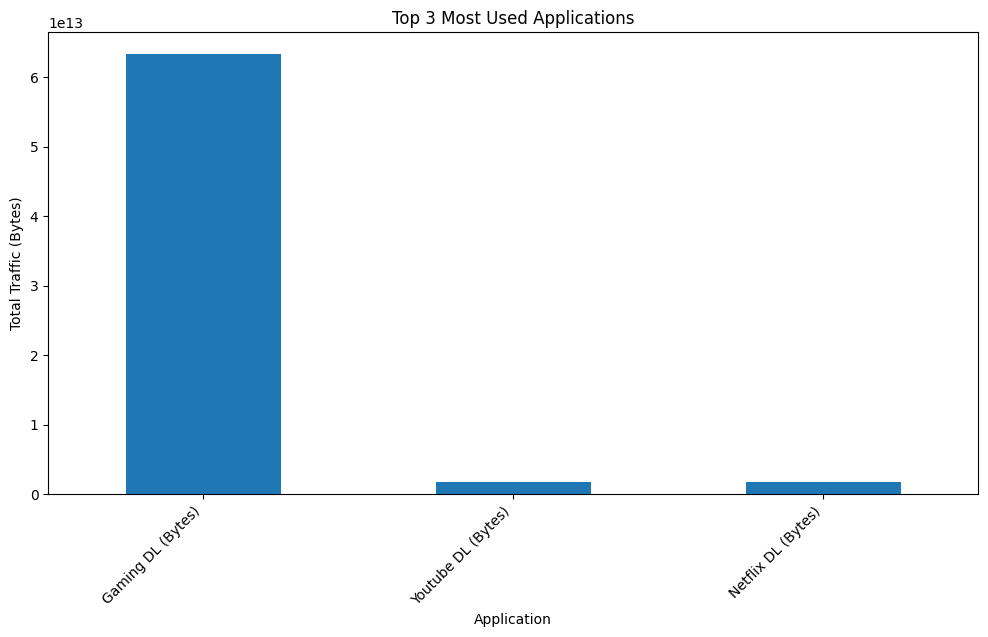

Gaming DL (Bytes)          6.330713e+13
Youtube DL (Bytes)         1.745123e+12
Netflix DL (Bytes)         1.744039e+12
Youtube UL (Bytes)         1.651423e+12
Netflix UL (Bytes)         1.650274e+12
Gaming UL (Bytes)          1.243268e+12
Google DL (Bytes)          8.626186e+11
Google UL (Bytes)          3.084833e+11
Social Media DL (Bytes)    2.693001e+11
Email DL (Bytes)           2.687611e+11
Email UL (Bytes)           7.010648e+10
Social Media UL (Bytes)    4.939298e+09
dtype: float64

In [18]:
# List of application columns
applications = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 
                'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
                'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)']
# Plot the top 3 applications
engagement_analyser.plot_top_applications(df, applications)

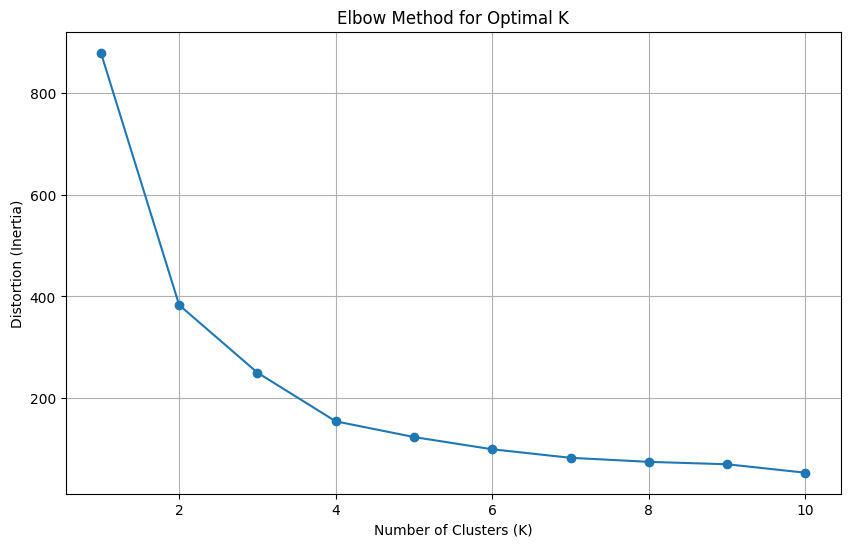

In [19]:
# Selecting only the relevant columns to plot elbow curve
metrics = ['Session Frequency', 'Total Duration', 'Total Traffic (Bytes)']
distortions = engagement_analyser.plot_elbow_curve(user_engagement_df, metrics, max_k=10)
